<a href="https://colab.research.google.com/github/JonRivera/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
import numpy as np
import math
import statistics
import scipy
sales  = np.array([3505,2400,3027,2798,3700,3250,2689])
round(sales.mean(),2)
#Mean of sales

3052.71

In [ ]:
#w/out lib functions
def mean(x):
  if len(x)==0:
    return None
  else:
    return sum(x)/len(x)

In [ ]:
mean(sales)

3052.714285714286

In [ ]:
#variance of sales w/ lib functions
np.var(sales,ddof=1)

214387.90476190473

In [ ]:
#Variance w/o lib functions
def variance(x):
  differences= []
  m = mean(x)
  for number in x:
    number = ((number - m)**2)
    differences.append(number)
  return sum(differences)/(len(x)-1)

variance(sales)



214387.90476190473

In [ ]:
#standard deviation
round(sales.std(ddof=1),2)

463.02

In [ ]:
#std w/o lib function
def std(x):
  differences = []
  m = mean(x)
  for number in x:
    number = ((number - m)**2)
    differences.append(number)
  return math.sqrt(sum(differences)/(len(x)-1))
std(sales)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
customers = np.array([127,80,105,92,120,115,93])
covariance = np.cov(sales,customers)
covariance

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
customers_std = customers.std(ddof=1)
sales_std = sales.std(ddof=1)
correlation_coefficient = covariance/(customers_std*sales_std)

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
df.describe()
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
a = np.array([1,0,0])
b= np.array([0,1,0])
#synonum for orthogoanl is perpendicular
#veryify a and b are perp
a @ b


0

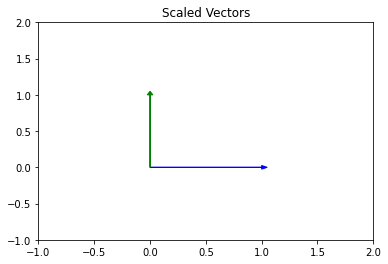

In [ ]:
# plotting vectors a and b 
import matplotlib.pyplot as plt

plt.arrow(0,0, a[0],a[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')

plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Scaled Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
#take the dot product to check if orthogonal
a = np.array([-5,3,7])
b = np.array([6,-8,2])
a@b

-40

In [ ]:
#These two vectors are not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([2,-15,6,20])
(np.linalg.norm(c))**2

665.0

In [ ]:
c@c

665

In [ ]:
(c.T)@c

665

In [ ]:
#All these vectors have the same product

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d =  1\begin{bmatrix}  7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d =  7\begin{bmatrix}  1 \\ 0 \end{bmatrix} + 12\begin{bmatrix}  0 \\ 1 \end{bmatrix}
\qquad
e = 2\begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11\begin{bmatrix} 0\\ 1 \\ 0  \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f = np.array([4,12,11,9,2])
f_length = np.linalg.norm(f)
f_unit = f/f_length
f_unit


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

In [ ]:
#linearly independent vectors

a = np.array([2, -1, 1])
b = np.array([3, -4, -2])
c = np.array([5, -10, -8])
abc = np.array([[2,3,5],[-1,-4,-10],[1,-2,-8]])



#linearly dependent vectors
d = np.array([1,2])
e = np.array([-5,3])
de =np.array([[1,-5],[2,3]])

#if det 0 then linearly dependent
print(np.linalg.det(abc))
#if det non 0 then it is linearly independent
print(np.linalg.det(de))

0.0
13.0


## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).



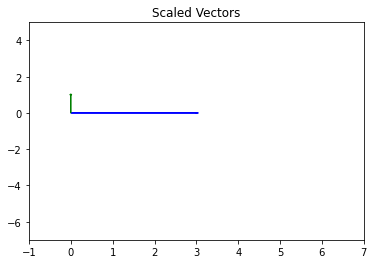

In [ ]:
#independent vectors
import matplotlib.pyplot as plt
a = np.array([3, 0, 0])
b = np.array([0, 1, 0])


plt.arrow(0,0, a[0],a[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,7)          
plt.ylim(-7,5)
plt.title("Scaled Vectors")
plt.show()

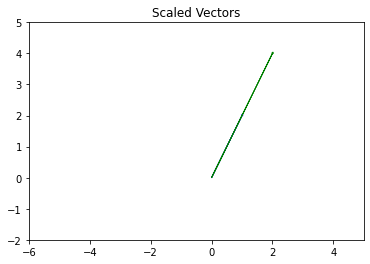

In [ ]:
#dependent vectors
d = np.array([1,2])
e = np.array([2,4])

plt.arrow(0,0, d[0],d[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, e[0], e[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-6,5)          
plt.ylim(-2,5)
plt.title("Scaled Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

\begin{align}
gh =  a\begin{bmatrix}  1 \\ 2 \end{bmatrix} + b\begin{bmatrix}  4 \\ 8 \end{bmatrix}
\qquad
\end{align}


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Span of {l,m,n}
lmn = c1[1,2,3] + c2[-1,0,7] + c3[4,8,2]
where C1,C2,C3 are scallares in R2.

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



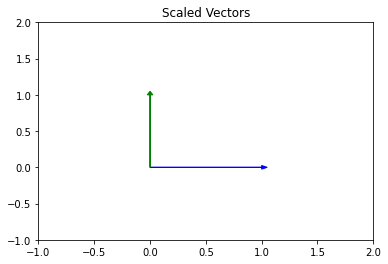

In [ ]:
a = np.array([1,0])
b = np.array([0,1])


plt.arrow(0,0, a[0],a[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')

plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.title("Scaled Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a set of vectors that generates all elements of the vector space and the vectors in the set are linearly independent

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
p = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the dimension of the vector space generated (or spanned) by its columns. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
v = np.array([1,3])
w = np.array([-1,2])
v_norm = np.sqrt(sum(v**2))
proj_w_on_v = (np.dot(w,v)/(v_norm**2))*v

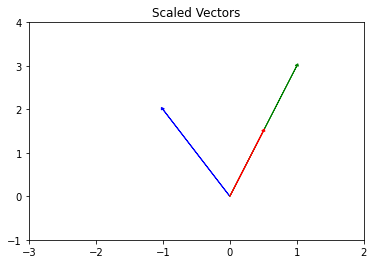

In [ ]:
a = w
b = v
c = proj_w_on_v

plt.arrow(0,0, a[0],a[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, c[0], c[1],head_width=.05, head_length=0.05, color ='red')

plt.xlim(-3,2)          
plt.ylim(-1,4)
plt.title("Scaled Vectors")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [ ]:
def proj_y_on_v(v,y):
  y_norm = np.sqrt(sum(y**2))
  projection = (np.dot(v,y)/(y_norm**2))*y
  return projection.tolist()

vectors = []
projections = []
x = np.linspace(-1,10,10).tolist()
v = np.array([1,2])
for number in (x):
  y = number
  vectors.append(np.array([number,y]))
for vector in vectors:
  projections.append(proj_y_on_v(v,vector))
V = np.array(projections)



In [163]:
V

array([[1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5],
       [1.5, 1.5]])

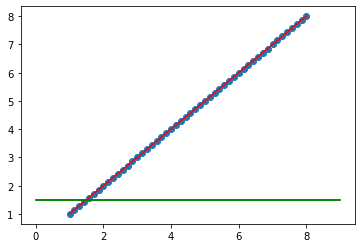

([1, 4], [4, 2], [7, 5], [3, 0], [9, 8], [4, 2], [5, 8])

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = np.linspace(1,8)
y_values = np.linspace(1,8)

data = {"x": x_values, "y": y_values}
df = pd.DataFrame(data)
df.head()

plt.scatter(df.x, df.y)
#represents y=x
plt.plot(x_values,x_values,'r')
plt.plot(V, 'g')
plt.show()

[1,4],[4,2],[7,5],[3,0],[9,8],[4,2],[5,8]